Logistic Regression

In [3]:
# we can apply logistic regression for classification , only if the data is linearly separable

In [4]:
# logistic regression can be classified into 3 types:
# 1) Binomial (only two possible types of dependents)
# 2) Multinomial (3 or more Unordered possible types of dependents)
# 3) Ordinal (3 or more Ordered possible types of dependents)

In [5]:
# For plotting the prediction graph in logistic regression , we use Sigmoid function:
# Sigmoid function : Y = (1)/(1+e^-x) , where e is the eulers constant , e = -2.71828

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#BINOMIAL CLASSIFICATION WITH SINGLE INPUT

In [7]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
# lets make a model which predicts purchased or not on the basis of age ,,, hence lets drop other columns

In [9]:
dataset1 = dataset.drop(columns=["User ID","Gender","EstimatedSalary"])

In [10]:
dataset1.head()

,Age,Purchased
0,19,0
1,35,0
2,26,0
3,27,0
4,19,0


In [11]:
#checking null values
dataset1.isnull().sum()

Age          0
Purchased    0
dtype: int64

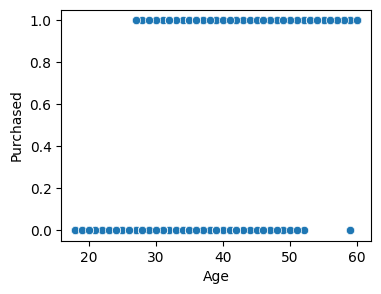

In [12]:
# lets see if data can be classified and follows logistic regression or not using a graph:
plt.figure(figsize=(4,3))
sns.scatterplot(x="Age",y="Purchased",data=dataset1)
plt.show()

In [13]:
# the data can he classified hence we can use logistic regression for prediction;

In [14]:
# lets seperate the input and output

In [15]:
x1_input = dataset1[["Age"]]
y1_output = dataset1[["Purchased"]]

In [16]:
# now lets split the train and test data:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1_input,y1_output,test_size=0.2,random_state=42)

In [17]:
# now lets apply logistic regression on the train and test data:
from sklearn.linear_model import LogisticRegression

In [18]:
lr1 = LogisticRegression()

In [19]:
#training the model
lr1.fit(x1_train,y1_train)

C:\Users\santo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [20]:
# the model is trained ,, now lets check the accuracy of the model :
lr1.score(x1_test,y1_test)*100

91.25

In [21]:
# our model is 91% accurate 

In [22]:
# lets do prediction , whether a peron of age 21 purchases the subcription or not:
lr1.predict([[21]])

C:\Users\santo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [23]:
# the prediction is no;

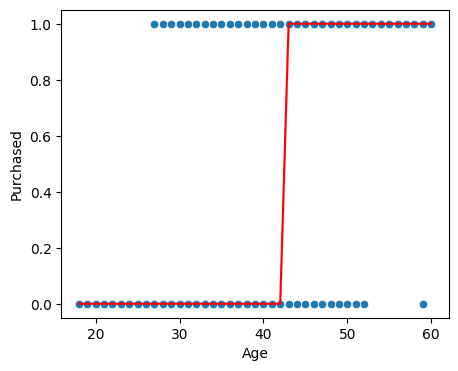

In [24]:
# lets plot the prediction line in the graph:
plt.figure(figsize=(5,4))
sns.scatterplot(x="Age",y="Purchased",data=dataset1)
sns.lineplot(x="Age",y = lr1.predict(x1_input),data=dataset1 , c="red")
plt.show()

#BINOMIAL CLASSIFICATION WITH MULTIPLE INPUT

In [25]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [26]:
dataset2 = dataset.drop(columns=["User ID","Gender"])

In [27]:
dataset2.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [28]:
# splitting input and output:
x2_input = dataset2.iloc[:,:-1]
y2_output = dataset2[["Purchased"]]

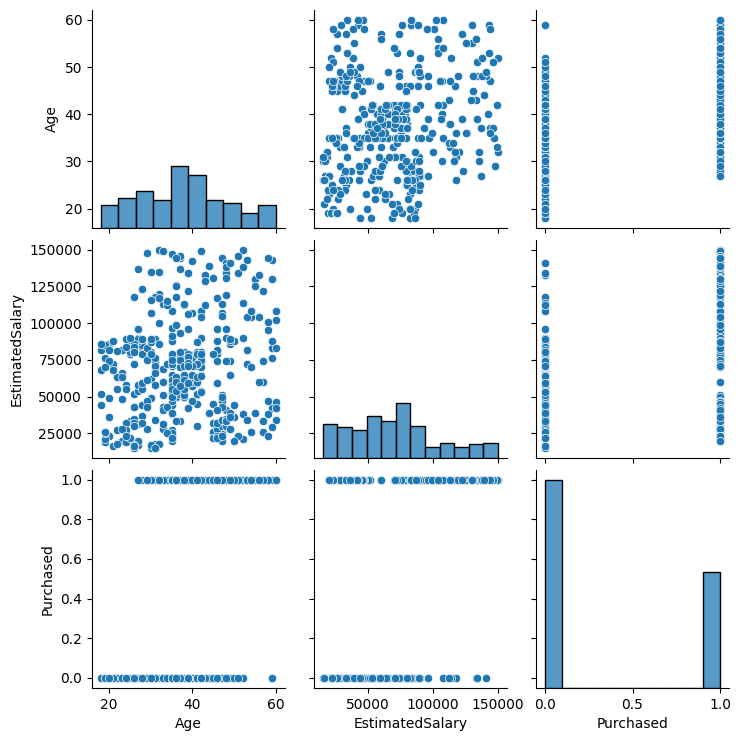

In [39]:
# lets plot the graph to see if its classiabble or not :
sns.pairplot(dataset2)
plt.show()

In [40]:
# now lets split data into train and test data:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2_input,y2_output,test_size=0.2,random_state=42)

In [41]:
#lets apply logistic regression now:
lr2 = LogisticRegression()

In [42]:
lr2.fit(x2_train,y2_train)

C:\Users\santo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [43]:
#the model is trained now ,, lets check the accuracy of the model:
lr2.score(x2_test,y2_test)*100

88.75

In [44]:
# hence our model is 88% accurate

In [45]:
# now lets predict that a person of age 46 with estimated salary 58000 purchases the Product or not:
lr2.predict([[46 , 58000]])

C:\Users\santo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [55]:
# the prediction says yes

In [56]:
# Prediction Graph

In [57]:
from mlxtend.plotting import plot_decision_regions

C:\Users\santo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


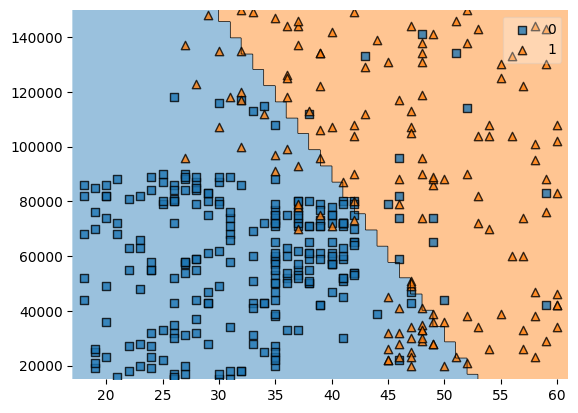

In [58]:
plot_decision_regions(x2_input.to_numpy(),dataset2["Purchased"].to_numpy(),clf=lr2)
plt.show()